# 3-神经网络基础
参考：海口数据培训课程

人类视觉识别的原理:

- visual cortex:V1,V2,V3,… …

- 每个V1有无数的neurons

- neurons之间互相联系

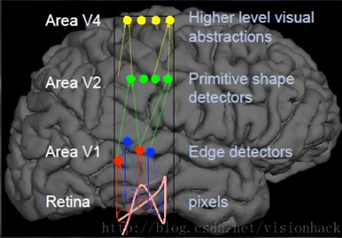

In [1]:
from IPython.display import Image
Image(filename='pic_dir/brain.png', width=250)

这个过程你不需要思考，历史的演化让这成为自然，让机器来做呢？

In [ ]:
困难：

因为太多的特例和异常情况。无法使用rules精确的刻画图片数字的特点。

- 神经网络(neural network)用了不同的方法，它从训练数据中，自动infer出rules来进行数字的识别。(学习)

- 随着训练数据的增多，我们可以improve its accuracy.

- 和之前讲到的机器学习技术一样，通过“学习”进行performance的提高，只是一套机器学习的方法

#### 第一个模型：

In [ ]:
artificial neuron -------> perceptron
# 在Titanic里用过

1957 Frank Rossenblatt 

perceptron是NN和SVM的基础

现代的其它artificial neuron模型：sigmoid neuron

#### perceptron 模型

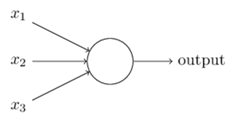

In [2]:
Image(filename='pic_dir/perceptron.png', width=250)

In [ ]:
perceptron：
1. 二元inputs
2. 二元outputs

参数:
1. weights
2. threshold value

In [ ]:
model：
output= 0,1(weights和threashold value决定)

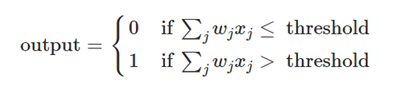

In [3]:
Image(filename='pic_dir/perout.png', width=250)

In [ ]:
这么简单能干啥？

In [ ]:
案例1：

makes decision（决策制定）

去一个cheese 狂欢节（去不去？）
条件：
1. 天气好不好（1,0）
2. 朋友去不去（1,0）
3. 有无交通工具（1,0）

In [ ]:
利用perceptron models：

模型1：
w1=6, w2=2, w3=2
threshold value = 5: 
- 天气好决定作用 

模型2：
threaashod value = 3: 
- 说不定

In [ ]:
显然，决策复杂一点，perceptron没啥用，并且注意w或者threashold的改变，对结果有很大影响

怎么办？想想大脑的类比（强行脑补，其实无太多脑科学实际依据）

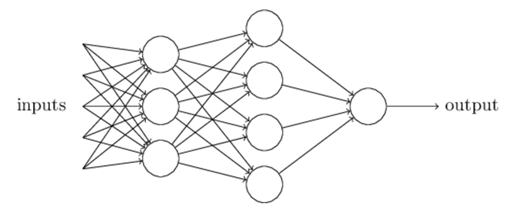

In [4]:
Image(filename='pic_dir/mlp.png', width=350)

In [ ]:
第一层：三个simple decision，由inputs加权产生

第二层：更加抽象（复杂）的decision

我们的目标：通过多层网络，逐级做出非常复杂的decision

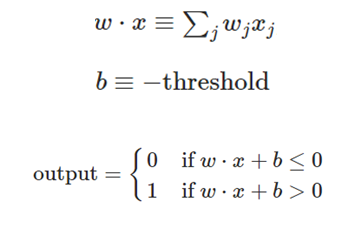

In [5]:
Image(filename='pic_dir/perb.png', width=250)

In [ ]:
bias的含义：

输出为1的容易程度的度量

bias越大，output越容易为1
bias越大，perceptron越容易被激发

另：bias这样表达，在后面会有简化表达的作用

案例2：（重要的物理含义）

perceptron来计算基本逻辑门

一个基础背景：
任何的计算由电路组成，AND,OR,NAND（与非门）作为基础的逻辑门电路，可以产生任何电路操作，可以做任何计算

意义：
NAND是最基础的门操作，由它可以组成任何逻辑操作
即：
perceptron理论上可以组成任何逻辑操作

NAND gate is universal for computation
networks of perceptrons can compute any logical function

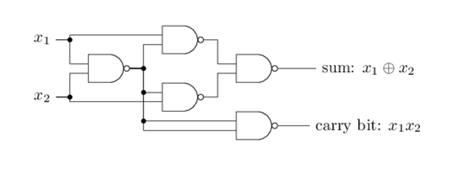

In [6]:
Image(filename='pic_dir/nand.png', width=350)

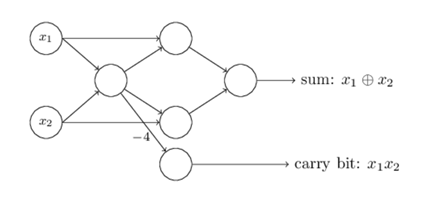

In [7]:
Image(filename='pic_dir/nandn.png', width=350)

问题：
NN和电路的区别？

- 1.NN可以用learning algorithms来达到computational universality（根据external stimuli，调节）


- 2.电路需要精确设计

In [ ]:
问题：

怎么学习呢？

动机：
- 用perceptron组成NN
- 用learning algorithm学习出weights和bias
- 然后来模拟任何计算

目标：
- 随着weight和bias的逐渐变化，output逐渐变化
- 这个性质才能使学习得到可能

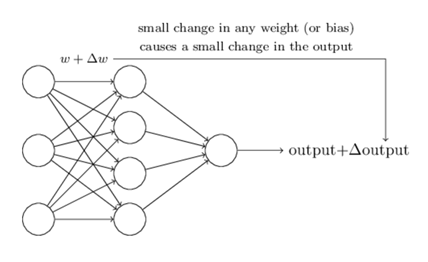

In [8]:
Image(filename='pic_dir/nn_learning.png', width=350)

In [ ]:
事实：

用perceptron不好学

一个perceptron动了，output准确；
而其它perceptron可能会有很大变化（0---1跳变），不可控

所以：由于二分跳变的原因，perceptron组成的NN不可控

怎么办？
- 引入新的neurons：sigmoid neuron

In [ ]:
好处：

w和bias的微小变化 ------------ >  输出的微小变化


sigmoid neuron组成NN是有可能学习

- 结构没有变化
- 对比感知器，中间的节点有变化
- input变化，output变化

sigmoid表达：
- output ：sigmoid(wx + b)

In [ ]:
想到了logistics 回归？？？
# logistic回归的NN表达

In [ ]:
sigmoid neuron和perceptron的相同：

当wx+b很大正数
sigmoid output趋向1，perceptron为1

当wx+b很小负数
sigmoid output趋向0，perceptron为0

In [ ]:
严格形式不重要，函数形状（性质）重要

In [ ]:
对比感知器的step function
sigmoid的函数性质更好

- sigmoid functoin是一个平滑化的step function
- 平滑才是核心性质
- 如果你可以找到符合这些性质的函数，你可以设计一个新的neuron
- A. 极限像perceptron
- B. 变化平滑

In [ ]:
我们可以将输出看成：output = f(wx + b)

f(.)是激活函数(activation function)--后面会专门讲到
sigmoid neuron 的激活函数是sigmoid funciont
perceptron 的激活函数是step function.

既然logistic回归也是一个神经网络， 那么让我们来拿他（NN）解决一个问题：

In [ ]:
异或问题XOR

In [ ]:
demo（有这样的一组数据，请分类）

In [10]:
import numpy as np
import tensorflow as tf
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 模型假设
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# 启动
with tf.Session() as sess:
    # 初始化
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

    # Acc情况
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.77921 [[-1.59267163]
 [-0.01960125]]
100 0.727306 [[-1.01454318]
 [-0.15487248]]
200 0.707112 [[-0.63111013]
 [-0.16868062]]
300 0.69901 [[-0.39507881]
 [-0.14749354]]
400 0.695669 [[-0.2496935 ]
 [-0.11733211]]
500 0.694252 [[-0.15934965]
 [-0.08862217]]
600 0.693638 [[-0.10261633]
 [-0.06482918]]
700 0.693367 [[-0.06661458]
 [-0.04642748]]
800 0.693246 [[-0.04354527]
 [-0.03276088]]
900 0.693192 [[-0.0286336 ]
 [-0.02287241]]
1000 0.693168 [[-0.01892153]
 [-0.01584382]]
1100 0.693156 [[-0.01255485]
 [-0.0109107 ]]
1200 0.693151 [[-0.0083584 ]
 [-0.00748008]]
1300 0.693149 [[-0.00557981]
 [-0.0051106 ]]
1400 0.693148 [[-0.00373316]
 [-0.0034825 ]]
1500 0.693148 [[-0.0025021 ]
 [-0.00236822]]
1600 0.693147 [[-0.00167942]
 [-0.00160789]]
1700 0.693147 [[-0.00112854]
 [-0.00109031]]
1800 0.693147 [[-0.00075905]
 [-0.00073863]]
1900 0.693147 [[-0.00051091]
 [-0.00049999]]
2000 0.693147 [[-0.00034407]
 [-0.00033825]]
2100 0.693147 [[-0.00023185]
 [-0.00022874]]
2200 0.693147 [[-0.00015

In [ ]:
啥情况？不好用？

In [ ]:
画图看看（logistics回归的决策边界是一个直线，0 = x1 + x2 + b）

In [ ]:
所以xor问题logistics回归搞不定

In [ ]:
于是想办法：
1. 类似SVM，引入kernel ，提高维度， 线性
2. 是不是多几个神经元，组合使用？（类似我们刚才提到的方法）

试试看：

- 1.先直觉思考， a线之上， b线之下，形成一个伪网络

- 2.用我们刚才的logistics回归的元素， 直接可以拼接

In [ ]:
x1----x2----y1----y2-----y_hat------y
0-----0----------------------------0
0-----1----------------------------1
1-----0----------------------------1
1-----1----------------------------0


凑一组w, b使得可以准确分类

利用
http://playground.tensorflow.org
演示xor的数据分类

我们不用自己去猜这组w，b，可以通过学习的方式（一个logistics可以训练，多个也可以）

先看代码：

In [11]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#注意，这里不再是一个logistics回归，而是两层

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')

hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))

    # ACC
    h, c, a = sess.run([hypothesis, predicted, accuracy],feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.680931 [array([[ 1.69796431,  1.60847068],
       [-0.69692045,  0.48425177]], dtype=float32), array([[ 1.65444028],
       [ 0.25193921]], dtype=float32)]
100 0.67179 [array([[ 1.73203909,  1.61097395],
       [-0.96552449,  0.52598327]], dtype=float32), array([[ 1.72911465],
       [ 0.24144799]], dtype=float32)]
200 0.663273 [array([[ 1.807917  ,  1.61317492],
       [-1.22091269,  0.56554282]], dtype=float32), array([[ 1.8286134],
       [ 0.2104077]], dtype=float32)]
300 0.654012 [array([[ 1.91944337,  1.61512494],
       [-1.46893477,  0.60212839]], dtype=float32), array([[ 1.95334816],
       [ 0.17868131]], dtype=float32)]
400 0.643723 [array([[ 2.05540776,  1.61642754],
       [-1.71527243,  0.63487828]], dtype=float32), array([[ 2.09837437],
       [ 0.1465748 ]], dtype=float32)]
500 0.632576 [array([[ 2.20608616,  1.61696589],
       [-1.9612186 ,  0.66286558]], dtype=float32), array([[ 2.25858545],
       [ 0.11431973]], dtype=float32)]
600 0.620976 [array([[ 2.3638227 

5100 0.0421469 [array([[ 6.11074018,  5.18742371],
       [-5.97575474, -4.76578617]], dtype=float32), array([[ 8.10299206],
       [-7.4195199 ]], dtype=float32)]
5200 0.0404939 [array([[ 6.12944078,  5.22357798],
       [-5.99690294, -4.80486298]], dtype=float32), array([[ 8.16893673],
       [-7.49787474]], dtype=float32)]
5300 0.0389608 [array([[ 6.14741802,  5.25818825],
       [-6.01733255, -4.84218359]], dtype=float32), array([[ 8.23291302],
       [-7.57332563]], dtype=float32)]
5400 0.0375353 [array([[ 6.1647234 ,  5.29136848],
       [-6.03708649, -4.87788486]], dtype=float32), array([[ 8.29502773],
       [-7.64607191]], dtype=float32)]
5500 0.0362066 [array([[ 6.18140268,  5.3232193 ],
       [-6.05620289, -4.91209221]], dtype=float32), array([[ 8.35538006],
       [-7.7162981 ]], dtype=float32)]
5600 0.0349654 [array([[ 6.19749594,  5.35383415],
       [-6.07471848, -4.94491148]], dtype=float32), array([[ 8.41405869],
       [-7.78416348]], dtype=float32)]
5700 0.0338036 [

那么再多加一层呢？

In [12]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(2017)
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Acc
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.748424 [array([[-1.57087862,  0.39220986, -1.63107228, -0.37035492, -0.75973076,
         1.15829873,  0.35151374, -0.01201795, -1.52745652, -0.81673187],
       [-0.00808487, -0.73629612,  1.78986216,  0.28808755,  0.20897092,
        -0.80384594,  0.48559541,  0.86096323, -1.53561282,  0.48118162]], dtype=float32), array([[ 0.57427692, -1.18737197, -0.08427703, -1.24597681,  1.34820771,
         0.39697057, -1.34925961, -0.43362778,  0.26723966,  0.76521069],
       [-1.49272561,  1.54404593,  0.01187179, -0.63264459,  0.284067  ,
        -0.28219751,  1.36309803, -0.48000062,  1.36440325,  0.60813355],
       [ 0.15199864, -1.10513568, -1.20743263, -2.00316453,  1.29839587,
        -1.4300406 , -0.53811961, -0.68013531,  0.74602401, -0.6980027 ],
       [-0.25277308, -0.84038717, -1.84967113,  0.12741804,  1.60546947,
         0.92172801, -0.38775638,  1.21736979, -0.90787822, -0.36892071],
       [ 0.32378703, -2.51963043,  0.28775576,  1.19101691,  1.14325643,
         0.70857

500 0.613337 [array([[-1.51684976,  0.67557836, -1.83474076, -0.12581098, -0.67950779,
         1.54960358,  0.23210534, -0.03816776, -1.9285742 , -0.86291283],
       [ 0.2405584 , -1.23319185,  1.65922737,  0.27441502,  0.03914519,
        -1.40540993,  0.42707726,  0.78115767, -1.80948889,  0.67894036]], dtype=float32), array([[ 0.49341914, -1.14701009, -0.06888667, -1.22495794,  1.35650408,
         0.14319943, -1.31081843, -0.53774852,  0.35569274,  0.77062279],
       [-1.53541625,  1.63341606,  0.03116001, -0.59170765,  0.34243375,
        -0.24290651,  1.57573986, -0.5249992 ,  1.40208566,  0.63381541],
       [ 0.35142714, -1.10942221, -1.224424  , -1.95489752,  1.27275765,
        -1.47090709, -0.93822867, -0.56350255,  0.77038759, -0.71909416],
       [-0.27013618, -0.79668486, -1.83559525,  0.15895051,  1.62653434,
         0.84561706, -0.41651163,  1.18324065, -0.86817616, -0.34961632],
       [ 0.29086012, -2.5055275 ,  0.29433113,  1.19926512,  1.1475209 ,
         0.628

1200 0.104274 [array([[-1.72998607,  1.49929798, -2.36782765,  0.46576124, -0.63630068,
         2.97930408, -0.25213456,  0.10967242, -2.57661366, -1.33973944],
       [ 1.06937337, -2.54239607,  2.12740803,  0.33334196, -0.22368066,
        -2.58359766,  0.46251041,  0.62159306, -2.39065528,  1.11441231]], dtype=float32), array([[  1.57274336e-01,  -1.12691987e+00,   5.20694628e-02,
         -1.39034915e+00,   1.34845304e+00,  -4.75776404e-01,
         -1.61078763e+00,  -8.13499928e-01,   4.74761665e-01,
          8.31558108e-01],
       [ -1.74311090e+00,   2.32946110e+00,   6.80295154e-02,
         -3.57863396e-01,   4.32875246e-01,   5.14087044e-02,
          2.33690500e+00,  -6.59752131e-01,   1.47276366e+00,
          7.42813408e-01],
       [  1.77198365e-01,  -1.34431827e+00,  -1.12375426e+00,
         -2.27492642e+00,   1.22741294e+00,  -2.09899926e+00,
         -1.70758557e+00,  -6.72051549e-01,   8.32821846e-01,
         -6.96878493e-01],
       [ -3.47336560e-01,  -6.23488

1700 0.0328443 [array([[-1.81832945,  1.73274386, -2.44768333,  0.61493176, -0.62866497,
         3.31764627, -0.35060945,  0.15603338, -2.69890857, -1.47700334],
       [ 1.25735581, -2.86104536,  2.28051591,  0.31242287, -0.25756106,
        -2.8395524 ,  0.48925349,  0.57843757, -2.52313876,  1.20567143]], dtype=float32), array([[ 0.11811969, -1.20409787,  0.11890663, -1.45289433,  1.3443104 ,
        -0.60140121, -1.71936786, -0.87672752,  0.48160449,  0.85465634],
       [-1.83071244,  2.5555253 ,  0.07706583, -0.27254429,  0.45660719,
         0.14400801,  2.54652762, -0.69780749,  1.50237787,  0.7752834 ],
       [ 0.14604744, -1.47445643, -1.04853177, -2.36160803,  1.21847355,
        -2.2637527 , -1.87117004, -0.73812032,  0.83337194, -0.6779688 ],
       [-0.3567664 , -0.61229229, -1.76753914,  0.05433515,  1.65960479,
         0.90672386, -0.51667875,  1.23613715, -0.87610006, -0.26274735],
       [ 0.21003078, -2.44573712,  0.3226977 ,  1.18466651,  1.15184867,
         0.5

2200 0.0173594 [array([[-1.85896993,  1.83882105, -2.4776895 ,  0.68034041, -0.62703359,
         3.45562625, -0.38881448,  0.17552748, -2.75068641, -1.53587353],
       [ 1.3370384 , -2.99423528,  2.34800386,  0.29429871, -0.26916334,
        -2.94968176,  0.50035191,  0.55974799, -2.57980132,  1.24483991]], dtype=float32), array([[ 0.10949147, -1.24549496,  0.15784949, -1.48219752,  1.34210455,
        -0.65201706, -1.76897454, -0.90284759,  0.48141757,  0.86721307],
       [-1.87801445,  2.66033959,  0.08144604, -0.2301921 ,  0.46784863,
         0.18298155,  2.63660574, -0.7145586 ,  1.5194329 ,  0.78731537],
       [ 0.14137931, -1.53690505, -1.00438201, -2.40100765,  1.21434021,
        -2.33019376, -1.9411279 , -0.76656312,  0.83008844, -0.66659141],
       [-0.36217111, -0.60687941, -1.75480652,  0.04655385,  1.66382039,
         0.92993969, -0.5184198 ,  1.25090313, -0.88339561, -0.25148273],
       [ 0.20760708, -2.44439197,  0.3266072 ,  1.18403459,  1.15210533,
         0.5

         0.1677497 , -2.6469996 , -0.86730778,  0.90652454, -0.10173761]], dtype=float32)]
2800 0.0105564 [array([[-1.8878175 ,  1.91379678, -2.49689388,  0.72603911, -0.62678826,
         3.54803109, -0.41315752,  0.18880744, -2.78626108, -1.57632279],
       [ 1.39179146, -3.08455634,  2.39505005,  0.2787765 , -0.27599216,
        -3.02524281,  0.50771612,  0.54700232, -2.61861467,  1.27175069]], dtype=float32), array([[ 0.10632874, -1.27670598,  0.18870649, -1.50333405,  1.34039545,
        -0.68538636, -1.80397093, -0.92020309,  0.48017395,  0.87711287],
       [-1.91471922,  2.7354362 ,  0.0848668 , -0.19888934,  0.47603729,
         0.20918545,  2.69859123, -0.72625464,  1.53328216,  0.79370618],
       [ 0.14140551, -1.58226347, -0.96940941, -2.42911172,  1.21133339,
        -2.37370872, -1.98925638, -0.78547585,  0.82642961, -0.65716273],
       [-0.36697587, -0.60236812, -1.74511492,  0.04186714,  1.66699862,
         0.9473356 , -0.51894605,  1.26218045, -0.8887431 , -0.24371

3400 0.00740305 [array([[-1.90712643,  1.96387577, -2.50883341,  0.75632972, -0.62710774,
         3.60756612, -0.42805153,  0.19745132, -2.80963588, -1.60280812],
       [ 1.42778611, -3.1432898 ,  2.42627239,  0.26744422, -0.27993977,
        -3.07463098,  0.51238829,  0.5387516 , -2.64397454,  1.28933501]], dtype=float32), array([[ 0.10551421, -1.29839289,  0.21055603, -1.51768017,  1.33918321,
        -0.70657748, -1.82729495, -0.93125081,  0.47889203,  0.88422507],
       [-1.940943  ,  2.78606558,  0.08743064, -0.17735915,  0.48163942,
         0.22602585,  2.73932648, -0.73404408,  1.5435096 ,  0.79658997],
       [ 0.14297345, -1.61314476, -0.94467694, -2.44806457,  1.20927668,
        -2.40113759, -2.02088165, -0.7974211 ,  0.82338977, -0.65015668],
       [-0.37077019, -0.59895748, -1.73849595,  0.03910194,  1.66922438,
         0.95937282, -0.51895213,  1.27007616, -0.89228487, -0.23882067],
       [ 0.20539178, -2.44320536,  0.33143282,  1.1834681 ,  1.15237415,
         0.

4000 0.00562656 [array([[-1.92142105,  2.00090694, -2.51721406,  0.77860993, -0.62761688,
         3.65054154, -0.43830505,  0.20372733, -2.82675195, -1.62211394],
       [ 1.45416045, -3.18598032,  2.4493103 ,  0.25869408, -0.28255829,
        -3.11059451,  0.51571304,  0.53279895, -2.66244912,  1.30211544]], dtype=float32), array([[ 0.10557335, -1.31485164,  0.22716287, -1.52842379,  1.33825064,
        -0.72170919, -1.84451628, -0.93914771,  0.47774634,  0.88973349],
       [-1.96130812,  2.82373857,  0.08953503, -0.16112481,  0.48585793,
         0.23812805,  2.76914763, -0.73980856,  1.55163622,  0.79783189],
       [ 0.14495216, -1.63629818, -0.92590606, -2.46219993,  1.20773149,
        -2.42058754, -2.04403639, -0.80587518,  0.82085419, -0.64460051],
       [-0.37392005, -0.5962171 , -1.73361194,  0.03723587,  1.670928  ,
         0.96846902, -0.51877499,  1.27608633, -0.89483356, -0.23545948],
       [ 0.20483267, -2.44291925,  0.33284229,  1.18332505,  1.15244567,
         0.

4600 0.00450177 [array([[-1.93266821,  2.03001595, -2.52353883,  0.79605746, -0.62818909,
         3.68374109, -0.4458884 ,  0.20859285, -2.84011912, -1.63712144],
       [ 1.47477353, -3.21913838,  2.46741796,  0.25164902, -0.28444776,
        -3.13854408,  0.51825064,  0.52821076, -2.67681646,  1.31201816]], dtype=float32), array([[  1.06014580e-01,  -1.32804239e+00,   2.40388855e-01,
         -1.53695810e+00,   1.33749652e+00,  -7.33303607e-01,
         -1.85804236e+00,  -9.45207536e-01,   4.76746112e-01,
          8.94201040e-01],
       [ -1.97794652e+00,   2.85349059e+00,   9.13457423e-02,
         -1.48179978e-01,   4.89222318e-01,   2.47431442e-01,
          2.79243135e+00,  -7.44348288e-01,   1.55838716e+00,
          7.98194885e-01],
       [  1.47008508e-01,  -1.65469933e+00,  -9.10978377e-01,
         -2.47339797e+00,   1.20649815e+00,  -2.43539739e+00,
         -2.06211805e+00,  -8.12296629e-01,   8.18701208e-01,
         -6.40011072e-01],
       [ -3.76618385e-01,  -5.939

5200 0.00373211 [array([[-1.9418844 ,  2.05384946, -2.52855086,  0.81030416, -0.62876129,
         3.71056795, -0.45177436,  0.21253312, -2.85101509, -1.64929807],
       [ 1.49158561, -3.24605131,  2.48225713,  0.24579662, -0.28589088,
        -3.16122699,  0.52028066,  0.52451342, -2.68848777,  1.32002652]], dtype=float32), array([[ 0.10663541, -1.33900905,  0.25127858, -1.54401028,  1.33687139,
        -0.74261451, -1.86911261, -0.95008332,  0.47587267,  0.89793998],
       [-1.99200988,  2.87793899,  0.09294778, -0.1374637 ,  0.49201   ,
         0.25491169,  2.81140065, -0.74807245,  1.56416523,  0.7980476 ],
       [ 0.14902823, -1.66990328, -0.89870495, -2.48262715,  1.20548284,
        -2.44722128, -2.07685399, -0.81741333,  0.81684101, -0.63611275],
       [-0.37898114, -0.59197712, -1.72676098,  0.03481185,  1.67345488,
         0.98173279, -0.51825148,  1.28490806, -0.89829475, -0.23119633],
       [ 0.2040887 , -2.44260883,  0.33478662,  1.18315363,  1.15258873,
         0.

5700 0.0032572 [array([[-1.94844544,  2.07080412, -2.53202033,  0.82042181, -0.62923813,
         3.72947025, -0.45578086,  0.21531309, -2.85874271, -1.65790045],
       [ 1.50351536, -3.26507854,  2.4928267 ,  0.2415964 , -0.2868638 ,
        -3.1772604 ,  0.52169955,  0.52191514, -2.69674492,  1.32566702]], dtype=float32), array([[ 0.10721954, -1.3469032 ,  0.25903726, -1.54906464,  1.33641648,
        -0.74914593, -1.8769871 , -0.95351142,  0.47522649,  0.90063941],
       [-2.00226879,  2.89537883,  0.09416004, -0.12977682,  0.49401176,
         0.26015899,  2.82484913, -0.75072628,  1.5684185 ,  0.79768121],
       [ 0.15065199, -1.68079877, -0.88997185, -2.48923135,  1.20474815,
        -2.45547414, -2.08730459, -0.82098067,  0.81546861, -0.63326496],
       [-0.38074943, -0.59054047, -1.72462118,  0.03409138,  1.67428803,
         0.9860394 , -0.51801306,  1.28778577, -0.89934331, -0.23000018],
       [ 0.20386164, -2.44248962,  0.3353844 ,  1.18309402,  1.15264833,
         0.5

6300 0.00281842 [array([[-1.95530689,  2.08852172, -2.53557038,  0.83098173, -0.62981033,
         3.74907064, -0.4598048 ,  0.21819815, -2.86679864, -1.66683757],
       [ 1.51595902, -3.28486753,  2.50388861,  0.23718026, -0.28783602,
        -3.193928  ,  0.52316105,  0.51922721, -2.70533609,  1.33150959]], dtype=float32), array([[ 0.10795648, -1.3552345 ,  0.26713997, -1.55438137,  1.33593321,
        -0.75589573, -1.88521671, -0.95706379,  0.47453231,  0.9034915 ],
       [-2.01322389,  2.91364551,  0.09549633, -0.12168878,  0.49612036,
         0.26557738,  2.83886194, -0.75350326,  1.57299411,  0.79705334],
       [ 0.1525169 , -1.69225609, -0.88086241, -2.49616981,  1.20398641,
        -2.46396279, -2.09820008, -0.82464796,  0.81399298, -0.63022637],
       [-0.38267732, -0.58900017, -1.72242165,  0.03336533,  1.67517483,
         0.99056798, -0.51772714,  1.29081845, -0.90040094, -0.22885315],
       [ 0.20362914, -2.44234657,  0.33599392,  1.1830225 ,  1.15266109,
         0.

6900 0.00247845 [array([[-1.96130705,  2.10400391, -2.53860903,  0.84020209, -0.63035154,
         3.76607895, -0.46318349,  0.22070314, -2.87382293, -1.67460513],
       [ 1.52681661, -3.3020854 ,  2.51357365,  0.23330183, -0.28864992,
        -3.208426  ,  0.52442116,  0.51690066, -2.71281648,  1.3365705 ]], dtype=float32), array([[ 0.1087065 , -1.36258435,  0.27420661, -1.55905759,  1.33550406,
        -0.76173598, -1.89241076, -0.9601481 ,  0.4739134 ,  0.90600681],
       [-2.02300262,  2.92964315,  0.09672561, -0.11457548,  0.49797705,
         0.27025861,  2.8510766 , -0.75593299,  1.57710302,  0.79629046],
       [ 0.15428852, -1.70233023, -0.87292868, -2.50226235,  1.20331168,
        -2.47127414, -2.10770321, -0.82780635,  0.81267053, -0.62752008],
       [-0.38443068, -0.58762169, -1.72053349,  0.03275214,  1.67595673,
         0.99454778, -0.5174762 ,  1.2934885 , -0.90129179, -0.2279442 ],
       [ 0.20342928, -2.44228601,  0.33651212,  1.18295097,  1.15266109,
         0.

7500 0.00220795 [array([[-1.96662939,  2.11772418, -2.54125261,  0.8483693 , -0.63087994,
         3.78106332, -0.4660697 ,  0.22291084, -2.88003922, -1.68145645],
       [ 1.53642619, -3.31729126,  2.52216864,  0.22985195, -0.28934553,
        -3.22122622,  0.52552521,  0.51485538, -2.71942902,  1.34102118]], dtype=float32), array([[ 0.10945342, -1.36915171,  0.2804504 , -1.56322527,  1.33513331,
        -0.76686949, -1.89878738, -0.96286899,  0.47335607,  0.90825152],
       [-2.0318327 ,  2.94384646,  0.0978652 , -0.10823695,  0.49963358,
         0.27436569,  2.8618784 , -0.75808835,  1.58083236,  0.79544222],
       [ 0.15597029, -1.7113061 , -0.86592764, -2.50768805,  1.20271182,
        -2.47767019, -2.11611247, -0.83057171,  0.81147444, -0.62508488],
       [-0.38603947, -0.58637625, -1.71888947,  0.03222458,  1.67665887,
         0.99809182, -0.51722586,  1.29587233, -0.90205365, -0.22721677],
       [ 0.20325428, -2.44228601,  0.33695981,  1.18287945,  1.15266109,
         0.

8100 0.00198809 [array([[-1.9714036 ,  2.13002253, -2.54358482,  0.85568875, -0.63138062,
         3.7944293 , -0.46857026,  0.22488017, -2.88560438, -1.68757284],
       [ 1.54503155, -3.33088112,  2.52988672,  0.22675052, -0.2899498 ,
        -3.23266125,  0.52650505,  0.51303482, -2.72533941,  1.34498072]], dtype=float32), array([[ 0.11018853, -1.3750813 ,  0.28602746, -1.5669812 ,  1.33477569,
        -0.77143991, -1.90450561, -0.96530139,  0.47285196,  0.91027331],
       [-2.03988218,  2.95659828,  0.09892801, -0.10252824,  0.50112742,
         0.27801448,  2.8715415 , -0.76002204,  1.58424735,  0.79453743],
       [ 0.15756768, -1.71939158, -0.85968232, -2.51257801,  1.20216966,
        -2.48334622, -2.12363672, -0.83302611,  0.81038386, -0.62287354],
       [-0.38752556, -0.58523947, -1.71744549,  0.0317638 ,  1.67730153,
         1.00128329, -0.51697552,  1.29801941, -0.9027127 , -0.22663058],
       [ 0.20309909, -2.44228601,  0.33735132,  1.18280792,  1.15266109,
         0.

8700 0.00180599 [array([[-1.97572637,  2.14114857, -2.54566097,  0.8623125 , -0.63186091,
         3.80646873, -0.47076225,  0.22665468, -2.89064002, -1.69308937],
       [ 1.5528127 , -3.34315014,  2.53688216,  0.22393732, -0.29048091,
        -3.24298167,  0.52738482,  0.51139671, -2.73068285,  1.34853959]], dtype=float32), array([[ 0.11090703, -1.38048196,  0.29105479, -1.57039785,  1.33447456,
        -0.77555263, -1.9096818 , -0.96749806,  0.47239113,  0.91211039],
       [-2.04728031,  2.96815205,  0.09992431, -0.09734084,  0.50248647,
         0.28128991,  2.8802712 , -0.76177239,  1.58739698,  0.79360759],
       [ 0.15908639, -1.72673905, -0.85405928, -2.51701331,  1.20166898,
        -2.48842812, -2.13044286, -0.83522958,  0.80938298, -0.62085003],
       [-0.38890758, -0.58419704, -1.71615827,  0.03135632,  1.67787373,
         1.00417936, -0.5167504 ,  1.29996896, -0.90328896, -0.22615631],
       [ 0.20296018, -2.44228601,  0.33769581,  1.1827364 ,  1.15266109,
         0.

9300 0.00165302 [array([[-1.97967196,  2.15129781, -2.5475409 ,  0.86835527, -0.63232583,
         3.81741118, -0.47270316,  0.22826719, -2.89522243, -1.69810426],
       [ 1.55990434, -3.35431743,  2.54327011,  0.22136588, -0.2909539 ,
        -3.2523737 ,  0.52818006,  0.50991148, -2.73554873,  1.35176551]], dtype=float32), array([[ 0.11160617, -1.38543725,  0.29562202, -1.57352591,  1.33418846,
        -0.77928591, -1.91440535, -0.96950072,  0.47196916,  0.9137913 ],
       [-2.05412006,  2.97870541,  0.10086225, -0.09259174,  0.50373209,
         0.28425598,  2.8882215 , -0.76336902,  1.59031868,  0.79264385],
       [ 0.16053265, -1.73346782, -0.84895718, -2.52107358,  1.20123148,
        -2.49302793, -2.13664675, -0.83722502,  0.80845851, -0.61898702],
       [-0.39019856, -0.58323306, -1.71500087,  0.03099227,  1.67840695,
         1.00683141, -0.51653582,  1.30175674, -0.90379959, -0.22577204],
       [ 0.20283318, -2.44228601,  0.33800346,  1.18269622,  1.15266109,
         0.

9900 0.00152274 [array([[-1.98329902,  2.16061997, -2.54923582,  0.87390697, -0.63276273,
         3.82742763, -0.47443631,  0.22974305, -2.89942813, -1.70269942],
       [ 1.56641364, -3.36455441,  2.5491488 ,  0.21900021, -0.29137963,
        -3.26098228,  0.5289067 ,  0.50855345, -2.74000502,  1.35471284]], dtype=float32), array([[ 0.11228504, -1.39001083,  0.29979941, -1.5764116 ,  1.33390236,
        -0.78270108, -1.91874504, -0.97133964,  0.47158059,  0.91533959],
       [-2.06048441,  2.98840499,  0.10174843, -0.08821569,  0.50487953,
         0.28696194,  2.89551234, -0.76483613,  1.59304106,  0.79167825],
       [ 0.16191235, -1.73967028, -0.84429604, -2.5248158 ,  1.20080233,
        -2.49721551, -2.14233398, -0.83904773,  0.80760026, -0.61726052],
       [-0.39141065, -0.58233684, -1.71395957,  0.03066437,  1.67890763,
         1.00926983, -0.51632124,  1.3034054 , -0.90425062, -0.22546107],
       [ 0.202718  , -2.44228601,  0.33827972,  1.18269622,  1.15266109,
         0.

In [ ]:
我们看到，层次越深度，越强的分类能力


流程：
1. 定义算法公式，前向的计算
2. 定义loss，选定优化器
3. 迭代训练
4. 测评

那么是怎么学出来的呢？
- **前馈神经网络**
- **反向传播算法**

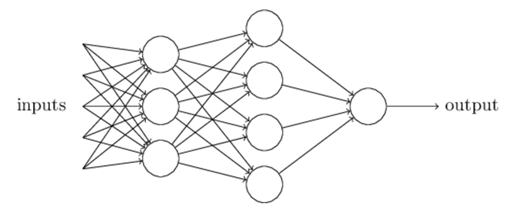

In [9]:
Image(filename='pic_dir/mlp.png', width=250)

In [ ]:
输入
隐层
输出

In [ ]:
一个sigmoid neuron计算没问题（就是之前的logistic回归的分析），很多很多（MLP）呢？

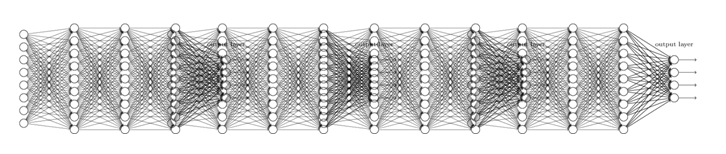

In [10]:
Image(filename='pic_dir/mmlp.png', width=350)

Perceptrons (1969) 
by Marvin Minsky, founder of the MIT AI Lab

>We need to use MLP, multilayer perceptrons (multilayer neural nets)
No one on earth had found a viable way to **train** MLPs good enough to learn such simple functions.

**Backpropagation** 
(1974, 1982 by Paul Werbos, 1986 by Hinton)

- 我们要做的是看w的扰动， L的变化，调节w，将L最小
- 那么我们要做的是让dL/dw最小
- 以logistics回归为例子：demo

现在可以反向传播求导数了，然后就可以逐步优化，逐层优化，学习合适的模型参数

In [ ]:
如刚才的例子，隐层变多，效果变好

In [15]:
# 作一下，8隐层

import tensorflow as tf
import numpy as np

tf.set_random_seed(2017)
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_uniform([2, 5], -1.0, 1.0), name='weight1')
b1 = tf.Variable(tf.zeros([5]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight2')
b2 = tf.Variable(tf.zeros([5]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight3')
b3 = tf.Variable(tf.zeros([5]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight4')
b4 = tf.Variable(tf.zeros([5]), name='bias4')
layer4 = tf.sigmoid(tf.matmul(layer3, W4) + b4)

W5 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight5')
b5 = tf.Variable(tf.zeros([5]), name='bias5')
layer5 = tf.sigmoid(tf.matmul(layer4, W5) + b5)

W6 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight6')
b6 = tf.Variable(tf.zeros([5]), name='bias6')
layer6 = tf.sigmoid(tf.matmul(layer5, W6) + b6)

W7 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight7')
b7 = tf.Variable(tf.zeros([5]), name='bias7')
layer7 = tf.sigmoid(tf.matmul(layer6, W7) + b7)

W8 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight8')
b8 = tf.Variable(tf.zeros([5]), name='bias8')
layer8 = tf.sigmoid(tf.matmul(layer7, W8) + b8)


W9 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight9')
b9 = tf.Variable(tf.zeros([5]), name='bias9')
hypothesis = tf.sigmoid(tf.matmul(layer8, W9) + b9)
#输出，8隐层

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.71853 [array([[-0.82234341,  0.31753415, -0.64612842,  0.72551823, -0.31310347],
       [-0.39259297, -0.91113859, -0.13090274, -0.12888165,  0.44418928]], dtype=float32), array([[-0.26163098, -0.9884547 ,  0.61311549,  0.96574998, -0.34209538],
       [-0.52707475, -0.91913921, -0.01617822,  0.86309433, -0.60965085],
       [-0.2784116 ,  0.20840566, -0.81063467, -0.33692929,  0.13317777],
       [ 0.8644715 ,  0.48022795,  0.06547629,  0.27552369, -0.51224613],
       [ 0.04031425, -0.65825915, -0.19006048,  0.09643295,  0.14331366]], dtype=float32)]
100 0.69467 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887958,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913056, -0.01618214,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841311, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.4802382 ,  0.

1900 0.693147 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887789,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913033, -0.01618294,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841496, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.48023984,  0.06547027,  0.27552456, -0.51224613],
       [ 0.04031758, -0.65824902, -0.1900658 ,  0.09643468,  0.14331387]], dtype=float32)]
2000 0.693147 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887789,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913033, -0.01618294,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841496, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.4802398

3700 0.693147 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887789,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913033, -0.01618294,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841496, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.48023984,  0.06547027,  0.27552456, -0.51224613],
       [ 0.04031758, -0.65824902, -0.1900658 ,  0.09643468,  0.14331387]], dtype=float32)]
3800 0.693147 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887789,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913033, -0.01618294,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841496, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.4802398

5500 0.693147 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887789,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913033, -0.01618294,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841496, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.48023984,  0.06547027,  0.27552456, -0.51224613],
       [ 0.04031758, -0.65824902, -0.1900658 ,  0.09643468,  0.14331387]], dtype=float32)]
5600 0.693147 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887789,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913033, -0.01618294,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841496, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.4802398

7300 0.693147 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887789,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913033, -0.01618294,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841496, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.48023984,  0.06547027,  0.27552456, -0.51224613],
       [ 0.04031758, -0.65824902, -0.1900658 ,  0.09643468,  0.14331387]], dtype=float32)]
7400 0.693147 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887789,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913033, -0.01618294,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841496, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.4802398

9100 0.693147 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887789,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913033, -0.01618294,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841496, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.48023984,  0.06547027,  0.27552456, -0.51224613],
       [ 0.04031758, -0.65824902, -0.1900658 ,  0.09643468,  0.14331387]], dtype=float32)]
9200 0.693147 [array([[-0.82234544,  0.31753173, -0.64612842,  0.72551823, -0.31310424],
       [-0.39259577, -0.91113931, -0.13090205, -0.12887789,  0.44418859]], dtype=float32), array([[-0.26163   , -0.98844826,  0.61311281,  0.96574998, -0.34209538],
       [-0.52707368, -0.91913033, -0.01618294,  0.86309433, -0.60965085],
       [-0.27841005,  0.20841496, -0.81063777, -0.33692852,  0.13317783],
       [ 0.86447346,  0.4802398

In [ ]:
啥情况？越多隐层越不准？

In [ ]:
梯度消失和梯度爆炸

参考sigmoid函数，

- 问题1. 初始化有问题
- 问题2. 不用sigmoid？

In [ ]:
先来用解决问题2 
ReLU: Rectified Linear Unit

In [ ]:
# tf写法
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

In [18]:
# 激活换成relu
# 注意，和初始化有很大关系，且数字太少，所以会跑不出来
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_uniform([2, 5], -1.0, 1.0), name='weight1')
b1 = tf.Variable(tf.zeros([5]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight2')
b2 = tf.Variable(tf.zeros([5]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight3')
b3 = tf.Variable(tf.zeros([5]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight4')
b4 = tf.Variable(tf.zeros([5]), name='bias4')
layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)

W5 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight5')
b5 = tf.Variable(tf.zeros([5]), name='bias5')
layer5 = tf.nn.relu(tf.matmul(layer4, W5) + b5)

W6 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight6')
b6 = tf.Variable(tf.zeros([5]), name='bias6')
layer6 = tf.nn.relu(tf.matmul(layer5, W6) + b6)

W7 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight7')
b7 = tf.Variable(tf.zeros([5]), name='bias7')
layer7 = tf.nn.relu(tf.matmul(layer6, W7) + b7)

W8 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight8')
b8 = tf.Variable(tf.zeros([5]), name='bias8')
layer8 = tf.nn.relu(tf.matmul(layer7, W8) + b8)


W9 = tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name='weight9')
b9 = tf.Variable(tf.zeros([5]), name='bias9')
hypothesis = tf.sigmoid(tf.matmul(layer8, W9) + b9)
#输出，8隐层

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Acc
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.690048 [array([[ 0.45764586, -0.43733335,  0.40652689, -0.97334862, -0.80393696],
       [-0.52954173, -0.39576793, -0.63100076,  0.00405129,  0.33794048]], dtype=float32), array([[ 0.09733486, -0.39531851, -0.11681318,  0.52087241,  0.56394905],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-0.98664474, -0.91323352, -0.2510612 ,  0.1160966 , -0.2457094 ],
       [ 0.17679787, -0.92964011, -0.36781669,  0.11867929, -0.55343008],
       [-0.05900979,  0.92137325,  0.16640615, -0.59317255,  0.41290152]], dtype=float32)]
100 0.636515 [array([[ 0.53054392, -0.43733335,  0.40199909, -0.97334862, -0.80393696],
       [-0.54017448, -0.39576793, -0.63100076,  0.00200986,  0.48834613]], dtype=float32), array([[ 0.10185392, -0.39961061, -0.11681318,  0.56759495,  0.59727478],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-0.98664474, -0.91323352, -0.2510612 ,  0.14919257, -0.2190354 ],
       [ 0.17679787, -0.92962426, -

1800 0.000259184 [array([[ 0.75829673, -0.43733335,  0.55223262, -0.97334862, -0.80099374],
       [-0.76432866, -0.39576793, -0.63100076,  0.00200986,  0.7825318 ]], dtype=float32), array([[ 0.10831898, -0.39127496, -0.11681318,  0.85678959,  0.77203488],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-1.0331651 , -0.91212583, -0.2510612 ,  0.3246187 , -0.0930552 ],
       [ 0.17679787, -0.92962426, -0.36783731,  0.11867929, -0.55343574],
       [-0.06143661,  1.17610633,  0.12100519, -0.58779663,  0.36365059]], dtype=float32)]
1900 0.000237849 [array([[ 0.75913072, -0.43733335,  0.55267787, -0.97334862, -0.80086732],
       [-0.76451951, -0.39576793, -0.63100076,  0.00200986,  0.78319579]], dtype=float32), array([[ 0.10823723, -0.39121222, -0.11681318,  0.85745639,  0.77237517],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-1.03329849, -0.91212583, -0.2510612 ,  0.32503688, -0.09276731],
       [ 0.17679787, -0.9

3600 9.20948e-05 [array([[ 0.766316  , -0.43733335,  0.55674624, -0.97334862, -0.79973495],
       [-0.76806629, -0.39576793, -0.63100076,  0.00200986,  0.79014593]], dtype=float32), array([[ 0.10779747, -0.39062098, -0.11681318,  0.86458272,  0.77587688],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-1.03437114, -0.91212583, -0.2510612 ,  0.32939383, -0.08976887],
       [ 0.17679787, -0.92962426, -0.36783731,  0.11867929, -0.55343574],
       [-0.06099112,  1.18095386,  0.12006331, -0.58801627,  0.36286455]], dtype=float32)]
3700 8.86073e-05 [array([[ 0.76654172, -0.43733335,  0.55689526, -0.97334862, -0.79969251],
       [-0.76825666, -0.39576793, -0.63100076,  0.00200986,  0.79042029]], dtype=float32), array([[ 0.10778863, -0.39059812, -0.11681318,  0.86485982,  0.77600461],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-1.03440762, -0.91212583, -0.2510612 ,  0.32956252, -0.08965296],
       [ 0.17679787, -0.9

5100 5.69913e-05 [array([[ 0.76920813, -0.43733335,  0.55853862, -0.97334862, -0.79924858],
       [-0.77024168, -0.39576793, -0.63100076,  0.00200986,  0.79350096]], dtype=float32), array([[ 0.10769501, -0.39035696, -0.11681318,  0.86797273,  0.77747935],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-1.03480315, -0.91212583, -0.2510612 ,  0.33144635, -0.08835856],
       [ 0.17679787, -0.92962426, -0.36783731,  0.11867929, -0.55343574],
       [-0.06077778,  1.18316329,  0.11965827, -0.58812147,  0.36248413]], dtype=float32)]
5200 5.55308e-05 [array([[ 0.7693693 , -0.43733335,  0.55863422, -0.97334862, -0.79922336],
       [-0.7703504 , -0.39576793, -0.63100076,  0.00200986,  0.79368079]], dtype=float32), array([[ 0.10768974, -0.39034414, -0.11681318,  0.86815411,  0.77756709],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-1.03482544, -0.91212583, -0.2510612 ,  0.33155599, -0.08828337],
       [ 0.17679787, -0.9

6900 3.81306e-05 [array([[ 0.77156359, -0.43733335,  0.5599792 , -0.97334862, -0.7988624 ],
       [-0.77194875, -0.39576793, -0.63100076,  0.00200986,  0.79623491]], dtype=float32), array([[ 0.10761161, -0.3901484 , -0.11681318,  0.87069249,  0.77877355],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-1.03514826, -0.91212583, -0.2510612 ,  0.33309215, -0.08722878],
       [ 0.17679787, -0.92962426, -0.36783731,  0.11867929, -0.55343574],
       [-0.06059495,  1.18498552,  0.11932691, -0.58820945,  0.3621608 ]], dtype=float32)]
7000 3.74093e-05 [array([[ 0.77166229, -0.43733335,  0.56004566, -0.97334862, -0.79884183],
       [-0.77203649, -0.39576793, -0.63100076,  0.00200986,  0.79636413]], dtype=float32), array([[ 0.1076086 , -0.39013758, -0.11681318,  0.87081611,  0.77883017],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-1.03516531, -0.91212583, -0.2510612 ,  0.33316797, -0.08717696],
       [ 0.17679787, -0.9

8400 2.94992e-05 [array([[ 0.7730099 , -0.43733335,  0.56086999, -0.97334862, -0.79862207],
       [-0.77300692, -0.39576793, -0.63100076,  0.00200986,  0.79794997]], dtype=float32), array([[ 0.10755979, -0.390019  , -0.11681318,  0.87236482,  0.77957058],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-1.03536177, -0.91212583, -0.2510612 ,  0.33410707, -0.08653228],
       [ 0.17679787, -0.92962426, -0.36783731,  0.11867929, -0.55343574],
       [-0.0604765 ,  1.18613005,  0.11912044, -0.58826298,  0.36195457]], dtype=float32)]
8500 2.90581e-05 [array([[ 0.77308786, -0.43733335,  0.56092334, -0.97334862, -0.79860491],
       [-0.77307612, -0.39576793, -0.63100076,  0.00200986,  0.79805434]], dtype=float32), array([[ 0.10755737, -0.39001033, -0.11681318,  0.87246227,  0.77961421],
       [ 0.19954038,  0.42773938,  0.28206635,  0.09767294,  0.59130073],
       [-1.03537464, -0.91212583, -0.2510612 ,  0.33416638, -0.08649147],
       [ 0.17679787, -0.9

In [20]:
# 初始化的值改变，算不出来了已经
# 初值很重要~~~~~~~~
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 10]), name='weight4')
b4 = tf.Variable(tf.random_normal([10]), name='bias4')
layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)

W5 = tf.Variable(tf.random_normal([10, 10]), name='weight5')
b5 = tf.Variable(tf.random_normal([10]), name='bias5')
layer5 = tf.nn.relu(tf.matmul(layer4, W5) + b5)

W6 = tf.Variable(tf.random_normal([10, 10]), name='weight6')
b6 = tf.Variable(tf.random_normal([10]), name='bias6')
layer6 = tf.nn.relu(tf.matmul(layer5, W6) + b6)

W7 = tf.Variable(tf.random_normal([10, 10]), name='weight7')
b7 = tf.Variable(tf.random_normal([10]), name='bias7')
layer7 = tf.nn.relu(tf.matmul(layer6, W7) + b7)

W8 = tf.Variable(tf.random_normal([10, 10]), name='weight8')
b8 = tf.Variable(tf.random_normal([10]), name='bias8')
layer8 = tf.nn.relu(tf.matmul(layer7, W8) + b8)


W9 = tf.Variable(tf.random_normal([10, 1]), name='weight9')
b9 = tf.Variable(tf.random_normal([1]), name='bias9')
hypothesis = tf.sigmoid(tf.matmul(layer8, W9) + b9)
#输出，8隐层

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Acc
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 nan [array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]], dtype=float32), array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]], dtype=float32)]
100 nan [array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  na

#### 激活函数

In [ ]:
激活函数的重要性

In [ ]:
tanh的好处：
1. -1,1，中心化的效果
2. 速度快

sigmoid好处：
1. 二分的时候好用，因为0--y---1之间

实际效果：（网络设计的启发式规则）

隐层用tanh， 输出层用sigmoid

缺点：
容易梯度消失
所以有relu

swiss

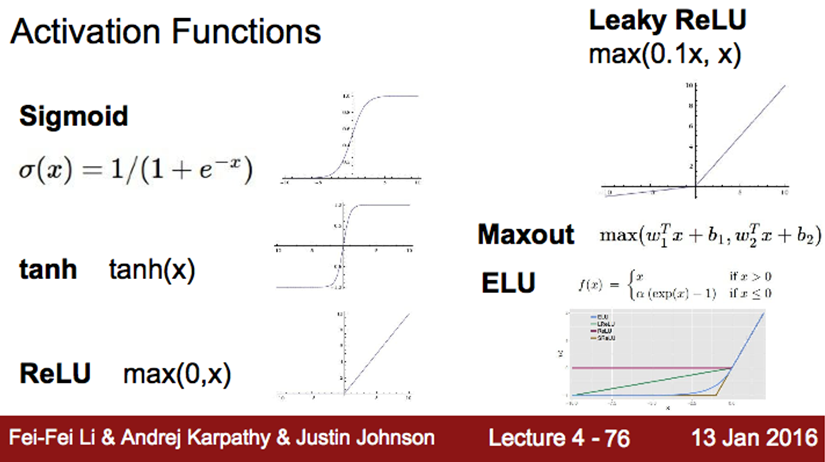

In [11]:
Image(filename='pic_dir/ac.png', width=450)

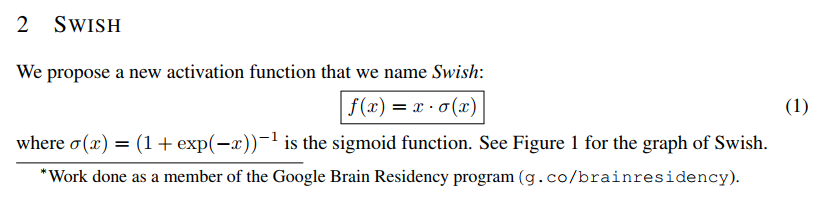

In [12]:
Image(filename='pic_dir/swish1.png', width=450)

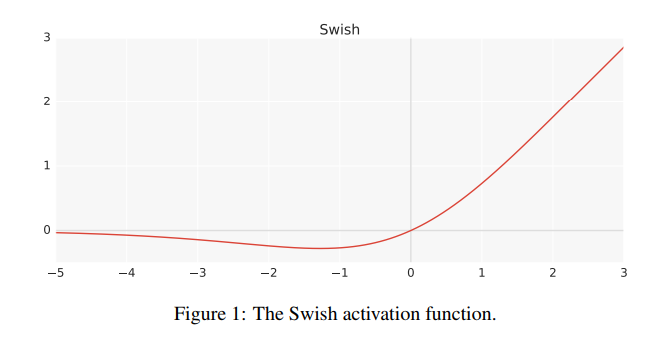

In [13]:
Image(filename='pic_dir/swish2.png', width=350)

总结一下：
1. logistics回归 
2. xor解决不了
3. 多层可以解决
4. 多层的梯度消失
5. 改变激活可以



<hr>

问题：改变激活带来了什么？

- 更多的非线性表达能力
- 于是一个多层的mlp+合适的激活表达非线性，可以解决很多复杂问题


<hr>

问题到这里是不是结束了呢？

并没有

问题：
1. 过拟合
2. 太复杂，参数爆炸

等等

In [ ]:
1. 过拟合的问题？
在传统机器学习里就大量存在，那么在深度学习中呢？

现象：
准确率在训练集上出色，在测试集上很差

何时容易出现过拟合？
比如，模型参数过于复杂
考虑L2罚函数
那么想象一下深度神经网络的参数？

In [ ]:
通常解决过拟合的方式
1. 增加数据量（不容易）
2. 降维
3. 正则

In [ ]:
传统的正则在深度学习中类似

比如加正则项（记得我们在神经网络中也是优化loss function的）

但在神经网络中，其实方法更多

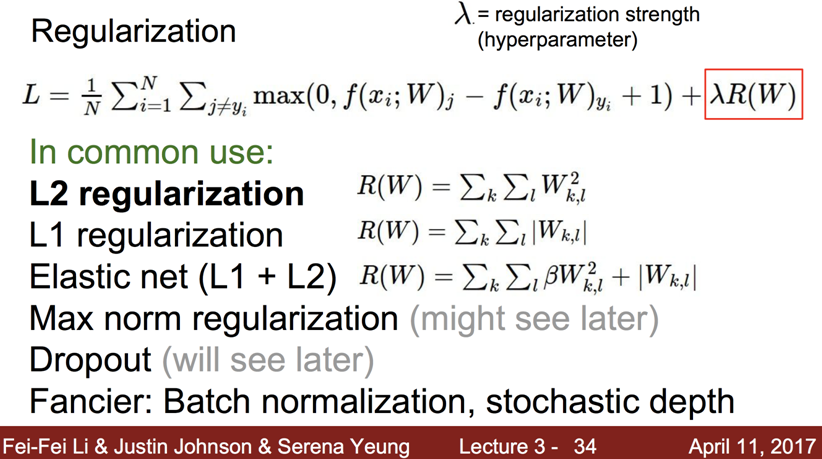

In [14]:
Image(filename='pic_dir/reg.png', width=350)

神经网络中特别的一种方式：

dropout

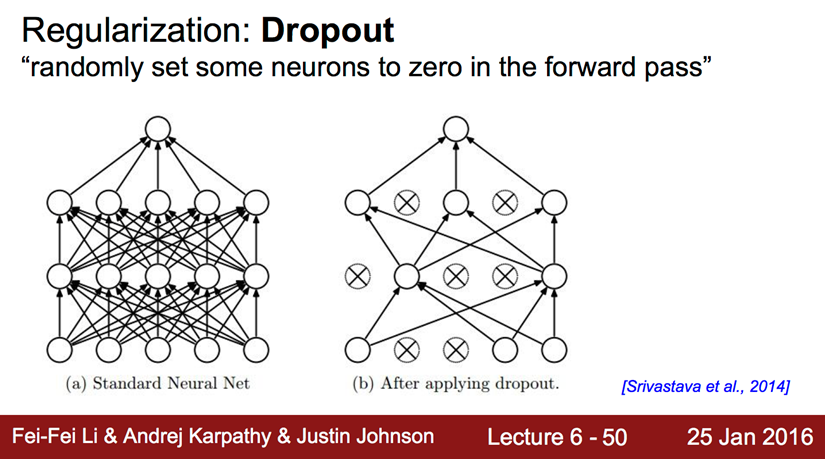

In [15]:
Image(filename='pic_dir/dropout.png', width=450)

In [ ]:
Dropout的效果：还是mnist的例子

In [28]:
tf.reset_default_graph()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.463528766
Epoch: 0002 cost = 0.171087505
Epoch: 0003 cost = 0.128452969
Epoch: 0004 cost = 0.105156277
Epoch: 0005 cost = 0.093835696
Epoch: 0006 cost = 0.082322751
Epoch: 0007 cost = 0.072594690
Epoch: 0008 cost = 0.070992011
Epoch: 0009 cost = 0.059902168
Epoch: 0010 cost = 0.061490361
Epoch: 0011 cost = 0.053128283
Epoch: 0012 cost = 0.052848857
Epoch: 0013 cost = 0.049203147
Epoch: 0014 cost = 0.047377230
Epoch: 0015 cost = 0.044345176
Learning Finished!
Accuracy: 0.9819
Label:  [3]
Prediction:  [3]


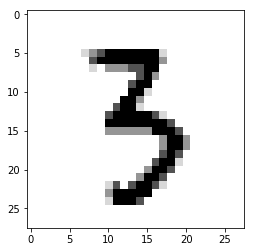

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(2017)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# 输入placeholders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob)比例，在训练集上为0.7，保留0.7
# 测试集上恢复1，即不过dropout
keep_prob = tf.placeholder(tf.float32)

# 注意初始化
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

#   cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 模型训练
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# 测试
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# 拿到一个数字测试
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), 
           cmap='Greys', interpolation='nearest')
plt.show()

还有呢？
- Initilizing weights
- Optimizers

In [ ]:
# 各种优化器，自适应的，动量概念的优化器
tf.train.AdadeltaOptimizer
tf.train.AdagradOptimizer
tf.train.AdagradDAOptimizer
tf.train.MomentumOptimizer
tf.train.AdamOptimizer
tf.train.FtrlOptimizer
tf.train.ProximalGradientDescentOptimizer
tf.train.ProximalAdagradOptimizer
tf.train.RMSPropOptimizer

#### 番外：有用的工具tensorboard

TensorBoard 涉及到的运算，通常是在训练庞大的深度神经网络中出现的复杂而又难以理解的运算。

为了更方便 TensorFlow 程序的理解、调试与优化，tf发布了一套叫做 TensorBoard 的可视化工具。你可以用 TensorBoard 来展现你的 TensorFlow 图像，绘制图像生成的定量指标图以及附加数据。

当 TensorBoard 设置完成后，如图：

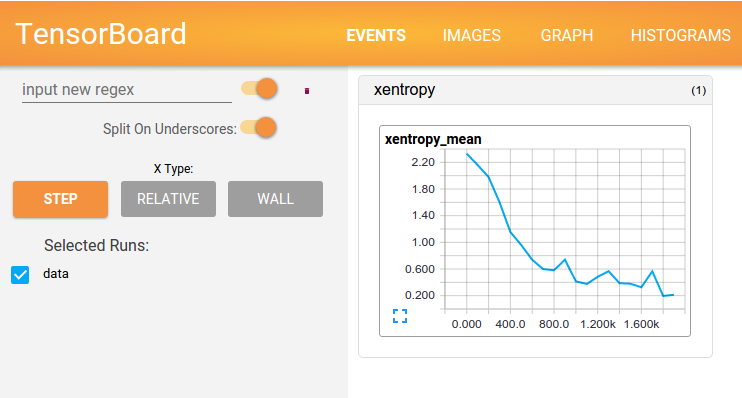

In [16]:
Image(filename='pic_dir/tfboard.png', width=450)

In [ ]:
步骤：
1. 记录你要记录的tensor

w2_hist = tf.summary.histogram("weights2", W2)
cost_summ = tf.summary.scalar("cost", cost)

2. 合并汇总：

summary = tf.summary.merge_all()

3. 建立汇总的writer，然后add graph
# Create summary writer
writer = tf.summary.FileWriter(‘./logs’)
writer.add_graph(sess.graph)

4. 运行summary汇总， add_summary函数

s, _ = sess.run([summary, optimizer], feed_dict=feed_dict)
writer.add_summary(s, global_step=global_step)

5. 开启 tensorboard
tensorboard --logdir=./logs

In [33]:
tf.reset_default_graph()

In [31]:
# tensorboard 测试
import tensorflow as tf
import numpy as np

tf.set_random_seed(2017)
learning_rate = 0.01

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    w1_hist = tf.summary.histogram("weights1", W1)
    b1_hist = tf.summary.histogram("biases1", b1)
    layer1_hist = tf.summary.histogram("layer1", layer1)


with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    w2_hist = tf.summary.histogram("weights2", W2)
    b2_hist = tf.summary.histogram("biases2", b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                           tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train") as scope:
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

# 启动
with tf.Session() as sess:
    # 注意这里的tensorboard设置
    # tensorboard --logdir=./logs/demo
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/demo")
    writer.add_graph(sess.graph)  # 显示图像

    # 初始化
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        summary, _ = sess.run([merged_summary, train], feed_dict={X: x_data, Y: y_data})
        # 这里有add summary
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Acc
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.695317 [array([[ 0.78006017, -1.77941513],
       [-0.29118121, -0.34859541]], dtype=float32), array([[ 0.60773331],
       [-0.14100127]], dtype=float32)]
100 0.654697 [array([[ 1.97281921, -1.93492043],
       [-1.53195822, -0.38388273]], dtype=float32), array([[ 1.61915827],
       [ 0.15751517]], dtype=float32)]
200 0.51725 [array([[ 3.55914545, -3.59571242],
       [-2.85722637, -1.84520006]], dtype=float32), array([[ 3.10910535],
       [ 1.48144531]], dtype=float32)]
300 0.431228 [array([[ 4.67170048, -4.78542376],
       [-3.60588765, -2.52578521]], dtype=float32), array([[ 4.1104126 ],
       [ 2.55654192]], dtype=float32)]
400 0.396029 [array([[ 5.43359184, -5.5955205 ],
       [-4.02420998, -2.87887454]], dtype=float32), array([[ 4.76959181],
       [ 3.24633145]], dtype=float32)]
500 0.379202 [array([[ 6.00073957, -6.19467688],
       [-4.29729223, -3.10647225]], dtype=float32), array([[ 5.2504096 ],
       [ 3.73955393]], dtype=float32)]
600 0.36986 [array([[ 6.4515085

5000 0.346846 [array([[ 12.02255821, -12.46604729],
       [ -6.21822262,  -4.78768015]], dtype=float32), array([[ 10.19625473],
       [  8.70073414]], dtype=float32)]
5100 0.346831 [array([[ 12.09314346, -12.53877354],
       [ -6.23506641,  -4.80288315]], dtype=float32), array([[ 10.25444412],
       [  8.75917625]], dtype=float32)]
5200 0.346816 [array([[ 12.1631918 , -12.61090469],
       [ -6.25170517,  -4.81787729]], dtype=float32), array([[ 10.31221962],
       [  8.81720734]], dtype=float32)]
5300 0.346802 [array([[ 12.23273087, -12.682477  ],
       [ -6.26814651,  -4.83262587]], dtype=float32), array([[ 10.3696003],
       [  8.8748579]], dtype=float32)]
5400 0.34679 [array([[ 12.30178642, -12.75349236],
       [ -6.28439951,  -4.84718132]], dtype=float32), array([[ 10.42660904],
       [  8.93213654]], dtype=float32)]
5500 0.346778 [array([[ 12.37037849, -12.82409191],
       [ -6.30047274,  -4.86167765]], dtype=float32), array([[ 10.48326683],
       [  8.98905563]], dtype

10000 0.346592 [array([[ 15.2014389 , -15.73274708],
       [ -6.90972424,  -5.4115057 ]], dtype=float32), array([[ 12.84715366],
       [ 11.33551216]], dtype=float32)]

Hypothesis:  [[  5.00011921e-01]
 [  4.99996185e-01]
 [  9.99982119e-01]
 [  2.53557555e-05]] 
Correct:  [[ 1.]
 [ 0.]
 [ 1.]
 [ 0.]] 
Accuracy:  0.5


In [ ]:
# 在命令行下
#$ tensorboard —logdir=./logs/demo

In [ ]:
# 在远程环境下（你的深度学习环境跑在远程或者云上）
ssh -L local_port:127.0.0.1:remote_port username@server.com

In [ ]:
本地端：$ ssh -L 7007:127.0.0.0:6006 username@server.com
远程服务器或者云上：$ tensorboard —logdir=./logs/demo

In [ ]:
然后在本地浏览器访问7007端口，即http://127.0.0.1:7007

In [33]:
tf.reset_default_graph()

In [ ]:
# 跑一个mnist的数据 tensorboard（官方示例）

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


max_steps=1000
learning_rate=0.001
dropout=0.9
# 这是数据目录
data_dir='./mnist/input_data'
# 这是tensorboard，日志目录
log_dir='./mnist/logs/mnist_with_summaries'


# 数据导入
mnist = input_data.read_data_sets(data_dir,one_hot=True)

sess = tf.InteractiveSession()
# 多层模型

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 784], name='x-input')
    y_ = tf.placeholder(tf.float32, [None, 10], name='y-input')

with tf.name_scope('input_reshape'):
    image_shaped_input = tf.reshape(x, [-1, 28, 28, 1])
    tf.summary.image('input', image_shaped_input, 10)

  # 权重不能初始化为0
def weight_variable(shape):
    """Create a weight variable with appropriate initialization."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """Create a bias variable with appropriate initialization."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def variable_summaries(var):
    # 将汇总统计传入summary，为tensorboard服务
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)

def nn_layer(input_tensor, input_dim, output_dim, layer_name, act=tf.nn.relu):
    """Reusable code for making a simple neural net layer.
    It does a matrix multiply, bias add, and then uses relu to nonlinearize.
    It also sets up name scoping so that the resultant graph is easy to read,
    and adds a number of summary ops.
    """
    # Adding a name scope ensures logical grouping of the layers in the graph.
    with tf.name_scope(layer_name):
        # This Variable will hold the state of the weights for the layer
        with tf.name_scope('weights'):
            weights = weight_variable([input_dim, output_dim])
            variable_summaries(weights)
        with tf.name_scope('biases'):
            biases = bias_variable([output_dim])
            variable_summaries(biases)
        with tf.name_scope('Wx_plus_b'):
            preactivate = tf.matmul(input_tensor, weights) + biases
            tf.summary.histogram('pre_activations', preactivate)
        activations = act(preactivate, name='activation')
        tf.summary.histogram('activations', activations)
        return activations

hidden1 = nn_layer(x, 784, 500, 'layer1')

with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    tf.summary.scalar('dropout_keep_probability', keep_prob)
    dropped = tf.nn.dropout(hidden1, keep_prob)

# Do not apply softmax activation yet, see below.
y = nn_layer(dropped, 500, 10, 'layer2', act=tf.identity)

with tf.name_scope('cross_entropy'):
    # 注意用法，建议用tf.nn.softmax_cross_entropy_with_logits
    # 计算交叉熵损失，对batch平均
    # The raw formulation of cross-entropy,
    #
    # tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.softmax(y)),
    #                               reduction_indices=[1]))
    #
    # can be numerically unstable.
    #
    # So here we use tf.nn.softmax_cross_entropy_with_logits on the
    # raw outputs of the nn_layer above, and then average across
    # the batch.
    diff = tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_)
    with tf.name_scope('total'):
        cross_entropy = tf.reduce_mean(diff)
tf.summary.scalar('cross_entropy', cross_entropy)

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar('accuracy', accuracy)

# Merge all the summaries and write them out to log files (by default)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter(log_dir + '/train', sess.graph)
test_writer = tf.summary.FileWriter(log_dir + '/test')
tf.global_variables_initializer().run()

# Train the model, and also write summaries.
# Every 10th step, measure test-set accuracy, and write test summaries
# All other steps, run train_step on training data, & add training summaries

def feed_dict(train):
    """Make a TensorFlow feed_dict: maps data onto Tensor placeholders."""
    if train:
        xs, ys = mnist.train.next_batch(100)
        k = dropout
    else:
        xs, ys = mnist.test.images, mnist.test.labels
        k = 1.0
    return {x: xs, y_: ys, keep_prob: k}

  
saver = tf.train.Saver()  
for i in range(max_steps):
    if i % 10 == 0:  # Record summaries and test-set accuracy
        summary, acc = sess.run([merged, accuracy], feed_dict=feed_dict(False))
        test_writer.add_summary(summary, i)
        print('Accuracy at step %s: %s' % (i, acc))
    else:  # Record train set summaries, and train
        if i % 100 == 99:  # Record execution stats
            # 定义模型运行的选项
            run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
            run_metadata = tf.RunMetadata()
            summary, _ = sess.run([merged, train_step],
                                  feed_dict=feed_dict(True),
                                  options=run_options,
                                  run_metadata=run_metadata)
            train_writer.add_run_metadata(run_metadata, 'step%03d' % i)
            train_writer.add_summary(summary, i)
            saver.save(sess, log_dir+"/model.ckpt", i)
            print('Adding run metadata for', i)
        else:  # Record a summary
            summary, _ = sess.run([merged, train_step], feed_dict=feed_dict(True))
            train_writer.add_summary(summary, i)
train_writer.close()
test_writer.close()

Extracting ./mnist/input_data\train-images-idx3-ubyte.gz
Extracting ./mnist/input_data\train-labels-idx1-ubyte.gz
Extracting ./mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/input_data\t10k-labels-idx1-ubyte.gz
Accuracy at step 0: 0.0849
Accuracy at step 10: 0.7277
Accuracy at step 20: 0.8288
Accuracy at step 30: 0.8608
Accuracy at step 40: 0.8785
Accuracy at step 50: 0.8932
Accuracy at step 60: 0.8938
Accuracy at step 70: 0.9023
Accuracy at step 80: 0.9058
Accuracy at step 90: 0.9122
Adding run metadata for 99
Accuracy at step 100: 0.9153
Accuracy at step 110: 0.9183
Accuracy at step 120: 0.9163
Accuracy at step 130: 0.9226
Accuracy at step 140: 0.9213
Accuracy at step 150: 0.9233
Accuracy at step 160: 0.9268
Accuracy at step 170: 0.9228
Accuracy at step 180: 0.9249
Accuracy at step 190: 0.9324
Adding run metadata for 199
Accuracy at step 200: 0.9304
Accuracy at step 210: 0.9356
Accuracy at step 220: 0.9362
Accuracy at step 230: 0.9376
Accuracy at step 240: 0.9396
Accur

In [ ]:
测试：$ tensorboard —logdir=./mnist/logs/mnist_with_summaries